## Getting data from a Database ingestion example from DataCamp exercises

From the 'Streamlined Data Ingestion with pandas' course found [here](https://learn.datacamp.com/courses/streamlined-data-ingestion-with-pandas)

In [1]:
# Import dependencies
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

In [2]:
# Create database engine to manage connections
engine = create_engine("sqlite:///data/data.db")

In [3]:
# View the tables in the database
print(engine.table_names())

['boro_census', 'hpd311calls', 'weather']


In [4]:
# Load entire weather table by table name
weather = pd.read_sql("weather", engine)

In [5]:
# Alternative way to import the entire weather table using SQL
weather_SQL = pd.read_sql("SELECT * FROM weather", engine)

In [6]:
print(weather.equals(weather_SQL))

True


In [36]:
weather.head()

,station,name,latitude,longitude,elevation,date,month,awnd,prcp,snow,tavg,tmax,tmin
0,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/01/2017,December,5.37,0.00,0.0,,52,42
1,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/02/2017,December,3.13,0.00,0.0,,48,39
2,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/03/2017,December,2.01,0.00,0.0,,48,42
3,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/04/2017,December,3.58,0.00,0.0,,51,40
4,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,12/05/2017,December,6.71,0.75,0.0,,61,50


In [7]:
# Create a SQL query to load the entire hpd311calls table
query = """SELECT * FROM hpd311calls;"""

In [8]:
# Load hpd311calls table using variable SQL query
hpd311calls = pd.read_sql(query, engine)

In [9]:
# View the first few rows of hpd311calls data
hpd311calls.head()

,unique_key,created_date,agency,complaint_type,incident_zip,incident_address,community_board,borough
0,38070822,01/01/2018,HPD,HEAT/HOT WATER,10468,2786 JEROME AVENUE,07 BRONX,BRONX
1,38065299,01/01/2018,HPD,PLUMBING,10003,323 EAST 12 STREET,03 MANHATTAN,MANHATTAN
2,38066653,01/01/2018,HPD,HEAT/HOT WATER,10452,1235 GRAND CONCOURSE,04 BRONX,BRONX
3,38070264,01/01/2018,HPD,HEAT/HOT WATER,10032,656 WEST 171 STREET,12 MANHATTAN,MANHATTAN
4,38072466,01/01/2018,HPD,HEAT/HOT WATER,11213,1030 PARK PLACE,08 BROOKLYN,BROOKLYN


### Create more complicated query

In [10]:
# Write query in triple quotes to split line and query records only from Brooklyn
query = """SELECT *
            FROM hpd311calls
            WHERE borough = 'BROOKLYN';"""

In [11]:
# Query the database
brooklyn_calls = pd.read_sql(query, engine)

In [12]:
# Print the results
print(brooklyn_calls.borough.unique())

['BROOKLYN']


### Combining Conditions: AND

In [13]:
# Write query to get records about plumbing in the Bronx
and_query = """SELECT *
                FROM hpd311calls
                WHERE borough = 'BRONX'
                AND complaint_type = 'PLUMBING';"""

In [14]:
# Get calls about plumbing issues in the Bronx
bx_plumbing_calls = pd.read_sql(and_query, engine)

In [15]:
# Check record count
bx_plumbing_calls.shape

(2016, 8)

### Combining Conditions: OR

In [16]:
# Write query to get records about water leaks OR plumbing
or_query = """SELECT *
            FROM hpd311calls
            WHERE complaint_type = 'WATER LEAK'
            OR complaint_type = 'PLUMBING';"""

In [17]:
# Get calls that are about plumbing or water leaks
leaks_or_plumbing = pd.read_sql(or_query, engine)

In [18]:
# Check record count
leaks_or_plumbing.shape

(10684, 8)

<AxesSubplot:ylabel='borough'>

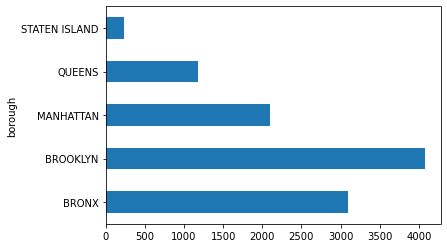

In [19]:
# Graph the number of records
call_counts = leaks_or_plumbing.groupby('borough').unique_key.count()
call_counts.plot.barh()

## Get DISTINCT Values

Unique values can be returned for one or more columns with `SELECT DISTINCT`

In [20]:
# Write query to get distinc street addresses and boroughs
distinct_query = """SELECT DISTINCT incident_address,
                    borough
                    FROM hpd311calls;"""

In [21]:
# Get records
unique_addresses = pd.read_sql(distinct_query, engine)

In [22]:
# Check record count
print(unique_addresses.shape)

(20140, 2)


## Aggregate functions

`SUM`, `AVG`, `MAX`, `MIN`
* Each takes a single column name

In [23]:
avg_query = """SELECT AVG(tmax)
                FROM weather;"""

`COUNT`
* Get number of rows that meet query conditions

In [24]:
count_query = """SELECT complaint_type,
                COUNT(*)
                FROM hpd311calls;"""

* Get number of unique values in a column

In [25]:
unique_vals_query = """SELECT COUNT(DISTINCT incident_address, borough
                        FROM  hpd311calls;)"""

In [37]:
# Create a query to get month and max tmax by month
tmax_query = """
SELECT month, 
       MAX(tmax)
  FROM weather 
  GROUP BY month;"""

In [38]:
# Get data frame of monthly weather stats
weather_by_month = pd.read_sql(tmax_query, engine)

In [39]:
# View weather stats by month
print(weather_by_month)

      month  MAX(tmax)
0  December         61
1  February         78
2   January         61
3     March         62


In [ ]:
# Create a query to get month, max tmax, and min tmin by month
Maquery = """
SELECT month, 
	   MAX(tmax), 
       MIN(tmin)
  FROM weather 
 GROUP BY month;
"""

## GROUP BY

* Aggregate functions calculate a single summary statistic by default
* Summarize data by categories with `GROUP BY` statements
* Remember to also select the column you're grouping by!

In [26]:
# Get counts of plumbing calls by borough
borough_count_query = """SELECT borough, 
                        COUNT(*)
                        FROM hpd311calls
                        WHERE complaint_type = 'PLUMBING'
                        GROUP BY borough;"""

In [27]:
# Query database and create data frame
plumbing_call_counts = pd.read_sql(borough_count_query, engine)

In [28]:
plumbing_call_counts.head()

,borough,COUNT(*)
0,BRONX,2016
1,BROOKLYN,2702
2,MANHATTAN,1413
3,QUEENS,808
4,STATEN ISLAND,178


<AxesSubplot:ylabel='borough'>

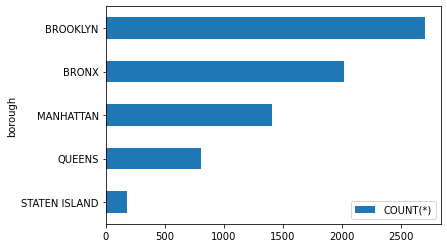

In [30]:
# Graph out the results
plumbing_call_counts.set_index('borough').sort_values(by='COUNT(*)').plot.barh()

In [31]:
# Create query to get call counts by complaint_type
complaint_query = """
SELECT complaint_type, 
     COUNT(*)
  FROM hpd311calls
  GROUP BY complaint_type;
"""

In [34]:
# Create data frame of call counts by issue
calls_by_issue = pd.read_sql(complaint_query, engine)

<AxesSubplot:ylabel='complaint_type'>

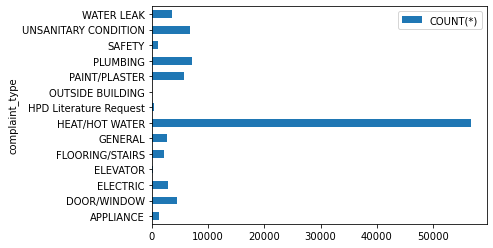

In [35]:
# Graph the number of calls for each housing issue
calls_by_issue.plot.barh(x="complaint_type")